In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as iter
import sqlite3

In [68]:
con = sqlite3.connect("data.db")
cursor = con.cursor()
cursor.execute("CREATE TABLE data_set(original, observe)")
p = "INSERT INTO data_set(original, observe) VALUES(?, ?)"

In [101]:
cursor.execute("DROP TABLE data_set")

In [69]:
#Creating a database with colomns(original, observe, count)

def calculation(p_array):
    for a_11,a_12,a_21,a_22 in iter.product([-1,0,1],[-1,0,1],[-1,0,1],[-1,0,1]):
        q_11 = p_array[0][0] * a_12 + p_array[0][1] * a_21 + p_array[1][0] * a_22 + p_array[1][1] * a_22
        q_12 = p_array[0][1] * a_12 + p_array[0][2] * a_21 + p_array[1][1] * a_22 + p_array[1][2] * a_22
        q_21 = p_array[1][0] * a_12 + p_array[1][1] * a_21 + p_array[2][0] * a_22 + p_array[2][1] * a_22
        q_22 =p_array[1][1] * a_12 + p_array[1][2] * a_21 + p_array[2][1] * a_22 + p_array[2][2] * a_22
        q_array = np.array([[q_11,q_12],[q_21,q_22]])
        cursor.execute(p, (str(p_array),str(q_array)))
        con.commit()

In [136]:
p_array = np.array([[1,1,1],[1,1,1],[1,1,1]])
_calculation(p_array)

In [70]:
for p_11,p_12,p_13,p_21,p_22,p_23,p_31,p_32,p_33 in iter.product([0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]):
    p_array = np.array([[p_11,p_12,p_13],[p_21,p_22,p_23],[p_31,p_32,p_33]])
    calculation(p_array)

In [146]:
cursor.execute('SELECT * FROM data_set')
cursor.fetchall()

[('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0]\n [0 0 0]\n [0 0 0]]', '[[0 0]\n [0 0]]'),
 ('[[0 0 0

In [134]:
#DELETE ALL DATA
cursor.execute('delete from data_set')
cursor.execute('select * from data_set')
cursor.fetchall()

[]

In [147]:
#GROUP BY OBSERVE Q
cursor.execute("select original,observe, COUNT(observe) from data_set group by observe")
cursor.fetchall()

[('[[1 1 1]\n [1 1 1]\n [1 1 0]]', '[[ 0  0]\n [ 0 -1]]', 501),
 ('[[1 1 1]\n [1 0 1]\n [0 1 1]]', '[[ 0  0]\n [ 0 -2]]', 30),
 ('[[1 1 1]\n [1 0 1]\n [1 1 1]]', '[[ 0  0]\n [ 1 -1]]', 150),
 ('[[1 1 1]\n [1 1 1]\n [0 1 1]]', '[[ 0  0]\n [-1  0]]', 501),
 ('[[1 1 1]\n [1 0 1]\n [1 1 1]]', '[[ 0  0]\n [-1  1]]', 150),
 ('[[1 1 1]\n [1 1 1]\n [1 0 1]]', '[[ 0  0]\n [-1 -1]]', 486),
 ('[[1 1 1]\n [1 1 1]\n [1 0 0]]', '[[ 0  0]\n [-1 -2]]', 138),
 ('[[1 1 0]\n [0 0 1]\n [0 1 1]]', '[[ 0  0]\n [-1 -3]]', 3),
 ('[[1 1 1]\n [1 0 1]\n [1 1 0]]', '[[ 0  0]\n [-2  0]]', 30),
 ('[[1 1 1]\n [1 1 1]\n [0 0 1]]', '[[ 0  0]\n [-2 -1]]', 138),
 ('[[1 1 1]\n [1 1 1]\n [0 0 0]]', '[[ 0  0]\n [-2 -2]]', 111),
 ('[[1 1 0]\n [0 0 1]\n [1 1 1]]', '[[ 0  0]\n [-2 -3]]', 3),
 ('[[0 1 1]\n [1 0 0]\n [1 1 0]]', '[[ 0  0]\n [-3 -1]]', 3),
 ('[[0 1 1]\n [1 0 0]\n [1 1 1]]', '[[ 0  0]\n [-3 -2]]', 3),
 ('[[1 1 1]\n [1 1 0]\n [1 1 1]]', '[[ 0  1]\n [ 0 -1]]', 168),
 ('[[1 1 1]\n [1 0 0]\n [0 1 1]]', '[[ 0  1]\n [ 0

In [103]:
#GROUP BY ORIGINAL P
cursor.execute("select original,observe, COUNT(original) from data_set where original = '[[0 0 0]\n [0 0 1]\n [0 0 0]]' group by observe")
cursor.fetchall()

[('[[0 0 0]\n [0 0 1]\n [0 0 0]]', '[[ 0  0]\n [ 0 -1]]', 9),
 ('[[0 0 0]\n [0 0 1]\n [0 0 0]]', '[[ 0  1]\n [ 0 -1]]', 9),
 ('[[0 0 0]\n [0 0 1]\n [0 0 0]]', '[[ 0 -1]\n [ 0  0]]', 9),
 ('[[0 0 0]\n [0 0 1]\n [0 0 0]]', '[[ 0 -1]\n [ 0  1]]', 9),
 ('[[0 0 0]\n [0 0 1]\n [0 0 0]]', '[[ 0 -1]\n [ 0 -1]]', 9),
 ('[[0 0 0]\n [0 0 1]\n [0 0 0]]', '[[0 0]\n [0 0]]', 9),
 ('[[0 0 0]\n [0 0 1]\n [0 0 0]]', '[[0 0]\n [0 1]]', 9),
 ('[[0 0 0]\n [0 0 1]\n [0 0 0]]', '[[0 1]\n [0 0]]', 9),
 ('[[0 0 0]\n [0 0 1]\n [0 0 0]]', '[[0 1]\n [0 1]]', 9)]

In [49]:
#when Q=(0,0,0,0,)
#cursor.execute("select original, observe, count(original) from data_set where observe = '[[0 0]\n [0 0]]' group by original;")
cursor.execute("select count(original) from (select original, observe, count(original) from data_set where observe = '[[0 0]\n [0 0]]' group by original)")
cursor.fetchall()

[(512,)]

In [88]:
def showBar(q_11,q_12,q_21,q_22):
    Q = np.array([[q_11,q_12],[q_21,q_22]])
    cursor.execute("select original, observe, count(original) from data_set where observe = '" + str(Q) + "' group by original;")
    data_set = cursor.fetchall()
    total = len(data_set)    
    
    if total >= 10:
        print("TOO MANY LABELS")
        plt.figure(dpi=100, figsize=(30,4))
    else:
        pass
    
    names = [data_set[i][0] for i in range(total-1)]
    values = [data_set[i][2] for i in range(total-1)]
    
    print(values)
    plt.figure(dpi = 100,figsize=(20,4))
    plt.bar(names, values)
    plt.show()

TOO MANY LABELS
[27, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 9]


<Figure size 3000x400 with 0 Axes>

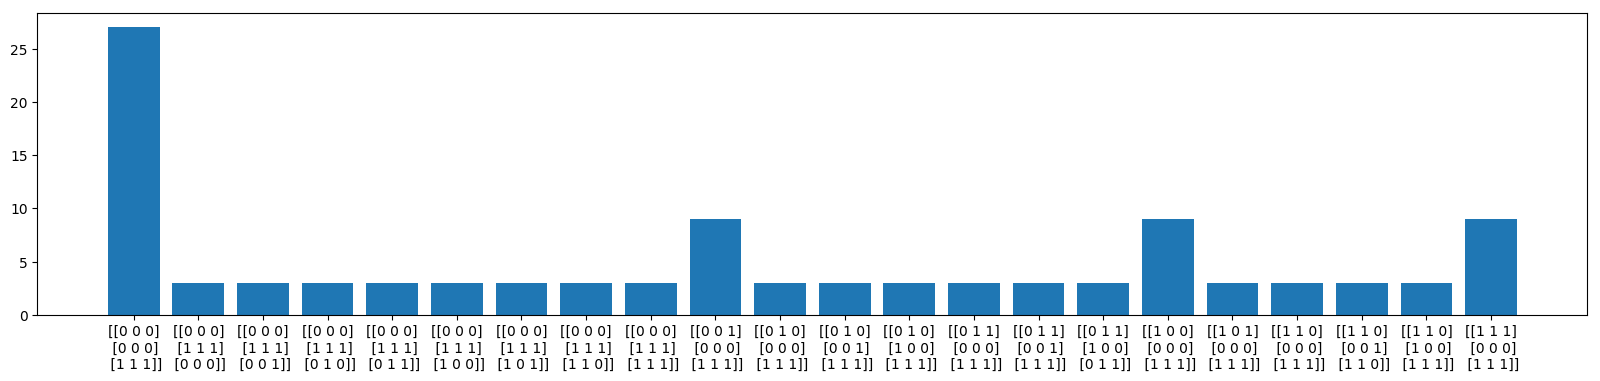

In [95]:
showBar(0,0,2,2)

In [38]:
print(data_set[0][0])
print(type(data_set[0][0]))

[[0 0 0]
 [0 0 0]
 [0 0 0]]
<class 'str'>


In [115]:
#This can't operate database
#Creating a dictionaly as database

def calculation(p_matrix):
    for a_11,a_12,a_21,a_22 in iter.product([-1,0,1],[-1,0,1],[-1,0,1],[-1,0,1]):
        q_11 = p_matrix[0] * a_12 + p_matrix[1] * a_21 + p_matrix[3] * a_22 + p_matrix[4] * a_22
        q_12 = p_matrix[1] * a_12 + p_matrix[2] * a_21 + p_matrix[4] * a_22 + p_matrix[5] * a_22
        q_21 = p_matrix[3] * a_12 + p_matrix[4] * a_21 + p_matrix[6] * a_22 + p_matrix[7] * a_22
        q_22 = p_matrix[4] * a_12 + p_matrix[5] * a_21 + p_matrix[7] * a_22 + p_matrix[8] * a_22
        q_matrix = np.array([[q_11,q_12],[q_21,q_22]])
        q_matrix = q_matrix * 64
        if str(q_matrix) in hist:
            hist[str(q_matrix)] += 1
        else:
            hist[str(q_matrix)] = 1
    print(str(p_matrix) + "is done")


[0, 0, 0, 0, 0, 0, 0, 0, 0]is done
[0, 0, 0, 0, 0, 0, 0, 0, 1]is done
[0, 0, 0, 0, 0, 0, 0, 1, 0]is done
[0, 0, 0, 0, 0, 0, 0, 1, 1]is done
[0, 0, 0, 0, 0, 0, 1, 0, 0]is done
[0, 0, 0, 0, 0, 0, 1, 0, 1]is done
[0, 0, 0, 0, 0, 0, 1, 1, 0]is done
[0, 0, 0, 0, 0, 0, 1, 1, 1]is done
[0, 0, 0, 0, 0, 1, 0, 0, 0]is done
[0, 0, 0, 0, 0, 1, 0, 0, 1]is done
[0, 0, 0, 0, 0, 1, 0, 1, 0]is done
[0, 0, 0, 0, 0, 1, 0, 1, 1]is done
[0, 0, 0, 0, 0, 1, 1, 0, 0]is done
[0, 0, 0, 0, 0, 1, 1, 0, 1]is done
[0, 0, 0, 0, 0, 1, 1, 1, 0]is done
[0, 0, 0, 0, 0, 1, 1, 1, 1]is done
[0, 0, 0, 0, 1, 0, 0, 0, 0]is done
[0, 0, 0, 0, 1, 0, 0, 0, 1]is done
[0, 0, 0, 0, 1, 0, 0, 1, 0]is done
[0, 0, 0, 0, 1, 0, 0, 1, 1]is done
[0, 0, 0, 0, 1, 0, 1, 0, 0]is done
[0, 0, 0, 0, 1, 0, 1, 0, 1]is done
[0, 0, 0, 0, 1, 0, 1, 1, 0]is done
[0, 0, 0, 0, 1, 0, 1, 1, 1]is done
[0, 0, 0, 0, 1, 1, 0, 0, 0]is done
[0, 0, 0, 0, 1, 1, 0, 0, 1]is done
[0, 0, 0, 0, 1, 1, 0, 1, 0]is done
[0, 0, 0, 0, 1, 1, 0, 1, 1]is done
[0, 0, 0, 0, 1, 1, 1

[0, 1, 1, 1, 1, 0, 1, 0, 1]is done
[0, 1, 1, 1, 1, 0, 1, 1, 0]is done
[0, 1, 1, 1, 1, 0, 1, 1, 1]is done
[0, 1, 1, 1, 1, 1, 0, 0, 0]is done
[0, 1, 1, 1, 1, 1, 0, 0, 1]is done
[0, 1, 1, 1, 1, 1, 0, 1, 0]is done
[0, 1, 1, 1, 1, 1, 0, 1, 1]is done
[0, 1, 1, 1, 1, 1, 1, 0, 0]is done
[0, 1, 1, 1, 1, 1, 1, 0, 1]is done
[0, 1, 1, 1, 1, 1, 1, 1, 0]is done
[0, 1, 1, 1, 1, 1, 1, 1, 1]is done
[1, 0, 0, 0, 0, 0, 0, 0, 0]is done
[1, 0, 0, 0, 0, 0, 0, 0, 1]is done
[1, 0, 0, 0, 0, 0, 0, 1, 0]is done
[1, 0, 0, 0, 0, 0, 0, 1, 1]is done
[1, 0, 0, 0, 0, 0, 1, 0, 0]is done
[1, 0, 0, 0, 0, 0, 1, 0, 1]is done
[1, 0, 0, 0, 0, 0, 1, 1, 0]is done
[1, 0, 0, 0, 0, 0, 1, 1, 1]is done
[1, 0, 0, 0, 0, 1, 0, 0, 0]is done
[1, 0, 0, 0, 0, 1, 0, 0, 1]is done
[1, 0, 0, 0, 0, 1, 0, 1, 0]is done
[1, 0, 0, 0, 0, 1, 0, 1, 1]is done
[1, 0, 0, 0, 0, 1, 1, 0, 0]is done
[1, 0, 0, 0, 0, 1, 1, 0, 1]is done
[1, 0, 0, 0, 0, 1, 1, 1, 0]is done
[1, 0, 0, 0, 0, 1, 1, 1, 1]is done
[1, 0, 0, 0, 1, 0, 0, 0, 0]is done
[1, 0, 0, 0, 1, 0, 0

[1, 1, 1, 1, 0, 0, 0, 0, 0]is done
[1, 1, 1, 1, 0, 0, 0, 0, 1]is done
[1, 1, 1, 1, 0, 0, 0, 1, 0]is done
[1, 1, 1, 1, 0, 0, 0, 1, 1]is done
[1, 1, 1, 1, 0, 0, 1, 0, 0]is done
[1, 1, 1, 1, 0, 0, 1, 0, 1]is done
[1, 1, 1, 1, 0, 0, 1, 1, 0]is done
[1, 1, 1, 1, 0, 0, 1, 1, 1]is done
[1, 1, 1, 1, 0, 1, 0, 0, 0]is done
[1, 1, 1, 1, 0, 1, 0, 0, 1]is done
[1, 1, 1, 1, 0, 1, 0, 1, 0]is done
[1, 1, 1, 1, 0, 1, 0, 1, 1]is done
[1, 1, 1, 1, 0, 1, 1, 0, 0]is done
[1, 1, 1, 1, 0, 1, 1, 0, 1]is done
[1, 1, 1, 1, 0, 1, 1, 1, 0]is done
[1, 1, 1, 1, 0, 1, 1, 1, 1]is done
[1, 1, 1, 1, 1, 0, 0, 0, 0]is done
[1, 1, 1, 1, 1, 0, 0, 0, 1]is done
[1, 1, 1, 1, 1, 0, 0, 1, 0]is done
[1, 1, 1, 1, 1, 0, 0, 1, 1]is done
[1, 1, 1, 1, 1, 0, 1, 0, 0]is done
[1, 1, 1, 1, 1, 0, 1, 0, 1]is done
[1, 1, 1, 1, 1, 0, 1, 1, 0]is done
[1, 1, 1, 1, 1, 0, 1, 1, 1]is done
[1, 1, 1, 1, 1, 1, 0, 0, 0]is done
[1, 1, 1, 1, 1, 1, 0, 0, 1]is done
[1, 1, 1, 1, 1, 1, 0, 1, 0]is done
[1, 1, 1, 1, 1, 1, 0, 1, 1]is done
[1, 1, 1, 1, 1, 1, 1

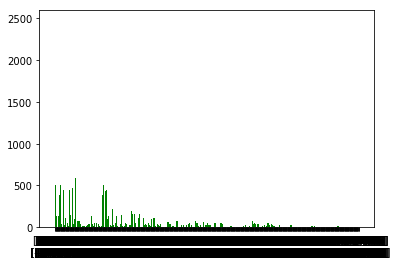

In [116]:
hist={}
for p_11,p_12,p_13,p_21,p_22,p_23,p_31,p_32,p_33 in iter.product([0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]):
    calculation([p_11,p_12,p_13,p_21,p_22,p_23,p_31,p_32,p_33])
sorted(hist.keys())
plt.bar(list(hist.keys()), hist.values(), color="g")
plt.show()